In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1

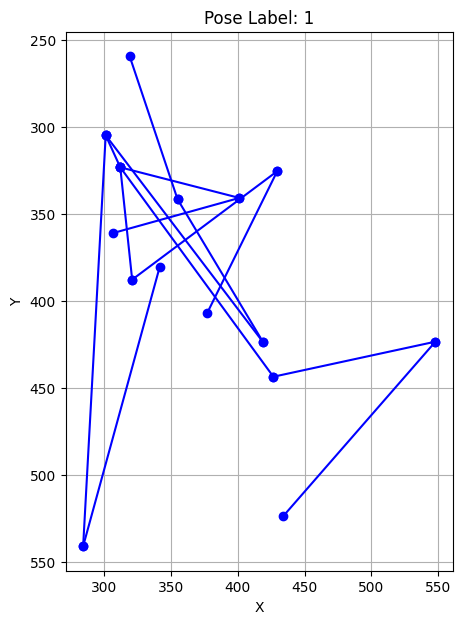

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load skeleton points and labels
skeleton_df = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Test_skelletonpoints.csv', header=None)
labels_df = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Test_labels.csv', header=None)

# Define skeletal connections (adjust if your skeleton has a different structure)
connections = [
    (0, 1), (1, 2), (2, 3),       # Right arm
    (0, 4), (4, 5), (5, 6),       # Left arm
    (0, 7), (7, 8), (8, 9),       # Right leg
    (7, 10), (10, 11), (11, 12),  # Left leg
    (0, 13), (13, 14)             # Neck to head
]

# Function to plot one pose
def plot_pose(sample_index):
    points = skeleton_df.iloc[sample_index].values
    label = labels_df.iloc[sample_index].values[0]
    coords = points.reshape(-1, 2)

    plt.clf()
    for start, end in connections:
        x_vals = [coords[start][0], coords[end][0]]
        y_vals = [coords[start][1], coords[end][1]]
        plt.plot(x_vals, y_vals, 'bo-')

    plt.title(f'Pose Label: {label}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.pause(0.5)  # Show each pose for 0.5 seconds

# Plot all poses
plt.figure(figsize=(5, 7))
for i in range(min(len(skeleton_df), len(labels_df))):
    plot_pose(i)

# Ensure final plot window doesn't close immediately
plt.show()




We visualize human poses by plotting skeletal points from a dataset and connecting key joints to form limbs. Each pose is displayed sequentially with its corresponding label to understand the posture.

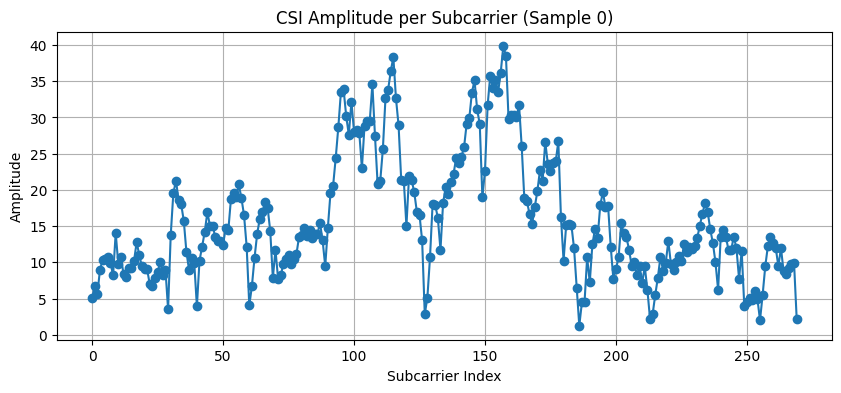

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load training CSI features
csi_df = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Train_features.csv', header=None)

# Plot average CSI amplitude for a single sample (e.g., sample 0)
def plot_average_csi(sample_index=0):
    csi_row = csi_df.iloc[sample_index].values
    num_subcarriers = len(csi_row)

    plt.figure(figsize=(10, 4))
    plt.plot(range(num_subcarriers), np.abs(csi_row), marker='o')
    plt.title(f'CSI Amplitude per Subcarrier (Sample {sample_index})')
    plt.xlabel('Subcarrier Index')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Example usage
plot_average_csi(0)


We analyze CSI (Channel State Information) data by plotting the amplitude of each subcarrier for a selected sample. This helps visualize the signal strength variations across the wireless channel.

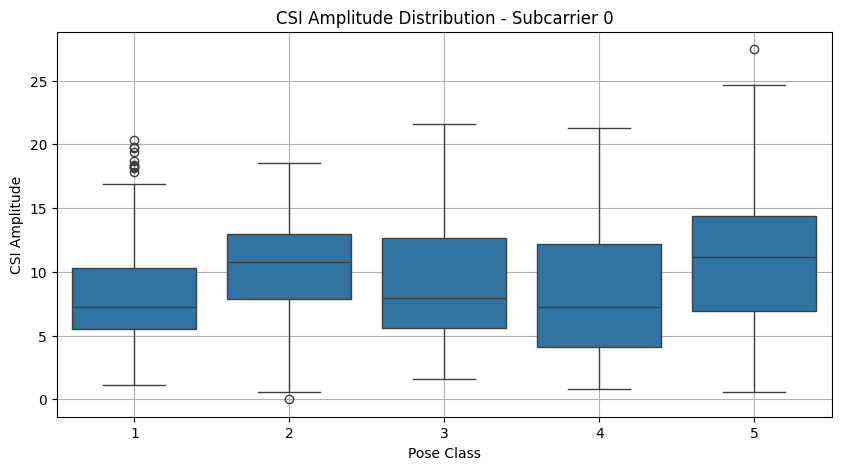

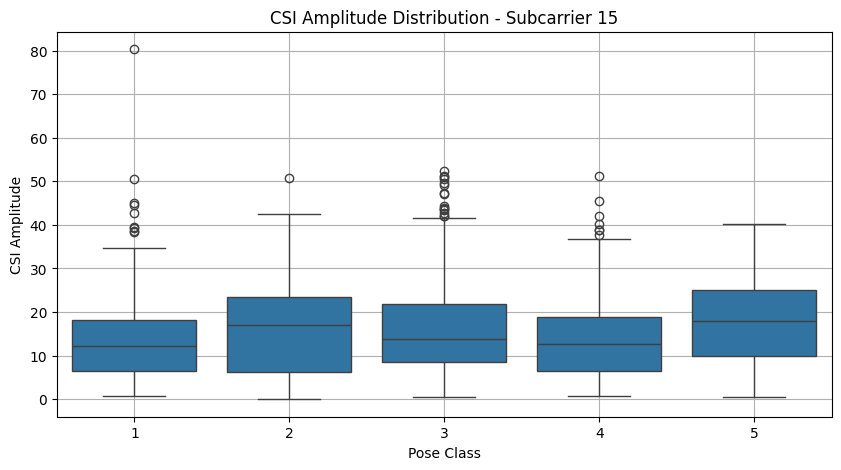

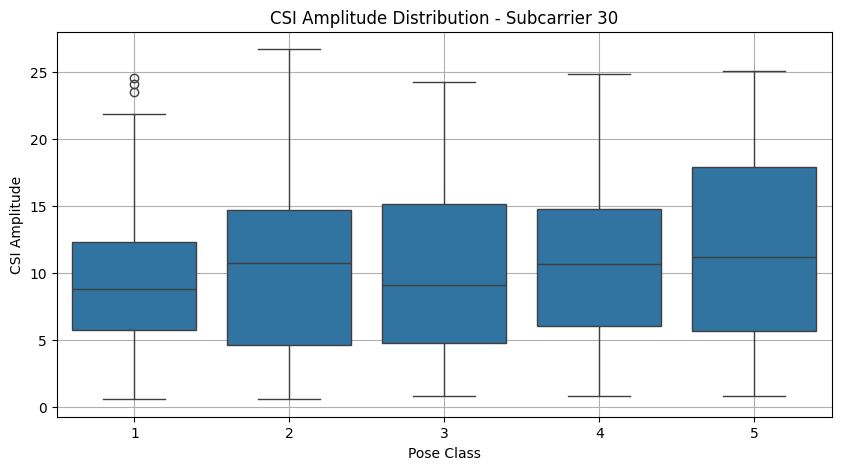

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSI and labels
csi_df = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Train_features.csv', header=None)
labels_df = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Train_labels.csv', header=None)
labels_df = labels_df.T  # Fix shape issue

# Merge CSI and labels
labels = labels_df[0].values
csi_df_labeled = csi_df.copy()
csi_df_labeled['label'] = labels

# Plot CSI distribution per class
def plot_csi_distribution(selected_subcarriers=[0, 15, 30]):
    for subcarrier in selected_subcarriers:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='label', y=subcarrier, data=csi_df_labeled)
        plt.title(f'CSI Amplitude Distribution - Subcarrier {subcarrier}')
        plt.xlabel('Pose Class')
        plt.ylabel('CSI Amplitude')
        plt.grid(True)
        plt.show()

# Example usage
plot_csi_distribution()



We explore the distribution of CSI amplitudes for different pose classes using boxplots. This comparison across selected subcarriers reveals how the wireless signal differs with each pose.

# Part 2

Accuracy: 0.6600

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.69      0.71        42
           2       0.55      0.79      0.65        39
           3       0.65      0.74      0.69        35
           4       0.73      0.42      0.53        38
           5       0.71      0.65      0.68        46

    accuracy                           0.66       200
   macro avg       0.67      0.66      0.65       200
weighted avg       0.68      0.66      0.66       200



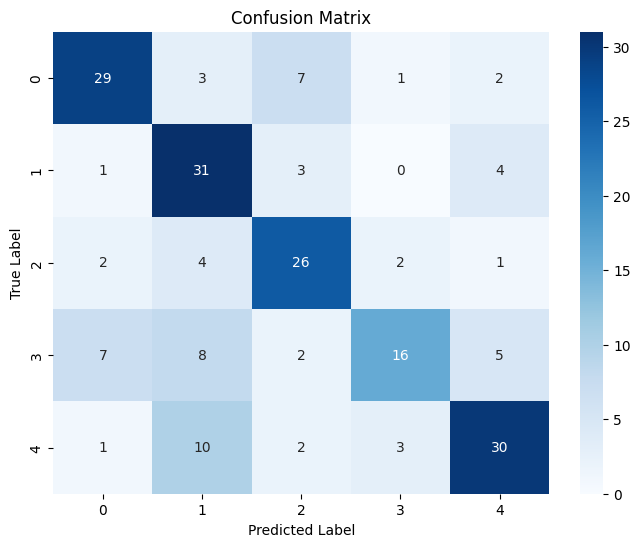

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load training and test datasets
X_train = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Train_features.csv', header=None)
y_train = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Train_labels.csv', header=None).squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Test_features.csv', header=None)
y_test = pd.read_csv('/content/drive/MyDrive/AAX/dataset_Seminar2/Test_labels.csv', header=None).squeeze()

# Train the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can tune C and gamma
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = svm_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


We train an SVM classifier on CSI features to recognize human poses based on Wi-Fi signals. The model predicts test labels, and its performance is evaluated using accuracy, precision, recall, and confusion matrix visualization.